# A1: Data Curation - Wikipedia Traffic  Analysis 

### Step 1: Data acquisition

Data for this assignment is gathered from two different API endpoints, the Legacy Pagecounts API and the Pageviews API. The date range of data is from December 2007 to September 2021. The following code use this
[example notebook](http://paws-public.wmflabs.org/paws-public/User:Jtmorgan/data512_a1_example.ipynb) as a reference. Five .json files are created in this step containing raw information on traffic made under each access plot form and each API. 

In [1]:
import json
import requests
import os 

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [3]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [4]:
# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/Sabrinawang06',
    'From': 'lxw5332@uw.edu'
}


# Legacy Pagecount 200712 - 202109  

#pacgecounts desktopsite 
desktop_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2021100100"
                    }

#pacgecounts mobile-site
mobile_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2021100100"
                    }


In [5]:
#Call the APIs to gather pagecounts for two access platforms 

pagecounts_desktop_site= api_call(endpoint_legacy, desktop_params_legacy)

pagecounts_mobile_site= api_call(endpoint_legacy, mobile_params_legacy)

In [6]:
# Pageview 200712-202109


# pageview desktop
desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2007120100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021100100'
                        }

# pageview mobile-app
mobile_app_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2007120100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021100100'
                        }

# pageview mobile-web
mobile_web_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2007120100",
                    # for end use 1st day of month following final month of data
                    "end" : '2021100100'
                        }

In [7]:
# Call the APIs to gather the pageviews for three access platforms 

pageviews_desktop= api_call(endpoint_pageviews, desktop_params_pageviews)

pageviews_mobile_app= api_call(endpoint_pageviews, mobile_app_params_pageviews)

pageviews_mobile_web= api_call(endpoint_pageviews, mobile_web_params_pageviews)

In [8]:
#save the 5 outputs to json files 

if not os.path.exists('./data'):
    os.makedirs('./data')

with open('./data/pagecounts_desktop-site_200712-20210.json', 'w') as outfile:
    json.dump(pagecounts_desktop_site,outfile)
    
with open('./data/pagecounts_mobile-site_200712-20210.json', 'w') as outfile:
    json.dump(pagecounts_mobile_site,outfile)
    
with open('./data/pageviews_desktop_200712-20210.json', 'w') as outfile:
    json.dump(pageviews_desktop,outfile)
    
with open('./data/pageviews_mobile-app_200712-20210.json', 'w') as outfile:
    json.dump(pageviews_mobile_app,outfile)
    
with open('./data/pageviews_mobile-web_200712-20210.json', 'w') as outfile:
    json.dump(pageviews_mobile_web,outfile)



### Step 2: Data processing

This step takes the previous created raw json files and reformat them into Pandas dataframes. Views under pageview mobile app and mobile web are summed together into pageview_mobile_views and all_views are calculaed as the total of all views under that API. Then the data is processed into thie following table format and outputed as a csv file (en-wikipedia_traffic_200712-202109.csv):  

| Column                  | Value     |
|-------------------------|-----------|
| year                    | YYYY      |
| month                   | MM        |
| pagecount_all_views     | num_views |
| pagecount_desktop_views | num_views |
| pagecount_mobile_views  | num_views |
| pageview_all_views      | num_views |
| pageview_desktop_views  | num_views |



In [9]:
# impor the library 

import pandas as pd

In [10]:
# Load the json files

pagecounts_desktop = json.load(open('./data/pagecounts_desktop-site_200712-20210.json',))
pagecounts_mobile = json.load(open('./data/pagecounts_mobile-site_200712-20210.json',))

pageviews_desktop = json.load(open('./data/pageviews_desktop_200712-20210.json',))
pageviews_mobile_app = json.load(open('./data/pageviews_mobile-app_200712-20210.json',))
pageviews_mobile_web = json.load(open('./data/pageviews_mobile-web_200712-20210.json',))


In [11]:
# Conver the json objects into dataframe and select the interested columns 

pc_desktop = pd.json_normalize(pagecounts_desktop, record_path =['items'])[["timestamp","count"]]
pc_mobile = pd.json_normalize(pagecounts_mobile, record_path =['items'])[["timestamp","count"]]

pv_desktop = pd.json_normalize(pageviews_desktop, record_path =['items'])[["timestamp","views"]]
pv_mobile_app = pd.json_normalize(pageviews_mobile_app, record_path =['items'])[["timestamp","views"]]
pv_mobile_web = pd.json_normalize(pageviews_mobile_web, record_path =['items'])[["timestamp","views"]]

In [12]:
# check for the shape 
pc_desktop.shape, pc_mobile.shape

((105, 2), (23, 2))

In [13]:
# combine two access platform for pagecounts 
pagecounts = pd.merge(pc_desktop, pc_mobile, on=['timestamp'],how='outer').fillna(0)

pagecounts.columns = ['timestamp', 'pagecount_desktop_views', 'pagecount_mobile_views']

pagecounts["pagecount_all_views"]=pagecounts.iloc[:,1]+pagecounts.iloc[:,2]


In [14]:
pagecounts

,timestamp,pagecount_desktop_views,pagecount_mobile_views,pagecount_all_views
0,2007120100,2998331524,0.000000e+00,2.998332e+09
1,2008010100,4930902570,0.000000e+00,4.930903e+09
2,2008020100,4818393763,0.000000e+00,4.818394e+09
3,2008030100,4955405809,0.000000e+00,4.955406e+09
4,2008040100,5159162183,0.000000e+00,5.159162e+09
...,...,...,...,...
100,2016040100,5572235399,3.301385e+09,8.873621e+09
101,2016050100,5330532334,3.418436e+09,8.748968e+09
102,2016060100,4975092447,3.372618e+09,8.347711e+09
103,2016070100,5363966439,3.500661e+09,8.864628e+09


In [15]:
# check for the shape 
pv_desktop.shape, pv_mobile_app.shape, pv_mobile_web.shape

((75, 2), (75, 2), (75, 2))

In [16]:
# sum the two mobile views for pageviews

pv_mobile = pd.merge(pv_mobile_app,pv_mobile_web,on=['timestamp'],how='outer').fillna(0)

pv_mobile['pv_mobile']=pv_mobile.iloc[:,1]+pv_mobile.iloc[:,2]

pv_mobile = pv_mobile.drop(columns=['views_x', 'views_y']) 


In [17]:
# combine two access platforms for pageviews 

pageviews = pd.merge(pv_desktop, pv_mobile, on=['timestamp'],how='outer').fillna(0)



pageviews.columns = ['timestamp', 'pageview_desktop_views', 'pageview_mobile_views']

pageviews["pageview_all_views"]=pageviews.iloc[:,1]+pageviews.iloc[:,2]


In [18]:
pageviews

,timestamp,pageview_desktop_views,pageview_mobile_views,pageview_all_views
0,2015070100,4376666686,3288755294,7665421980
1,2015080100,4332482183,3302333038,7634815221
2,2015090100,4485491704,3170203333,7655695037
3,2015100100,4477532755,3268499132,7746031887
4,2015110100,4287720220,3236601070,7524321290
...,...,...,...,...
70,2021050100,2824416177,4976579558,7800995735
71,2021060100,2505971366,4584510417,7090481783
72,2021070100,2765584368,4778909421,7544493789
73,2021080100,2763413934,4732194000,7495607934


In [19]:
# combine two APIs together and extract the year and months (discard the date and time)

traffic_full = pd.merge(pagecounts, pageviews, on=['timestamp'],how='outer').fillna(0)

traffic_full['year']=traffic_full['timestamp'].str[:4]
traffic_full['month']=traffic_full['timestamp'].str[4:6]

traffic_full_final = traffic_full[["year", 
                                  "month", 
                                  "pagecount_all_views",
                                  "pagecount_desktop_views",
                                  "pagecount_mobile_views",
                                  "pageview_all_views",
                                  "pageview_desktop_views",
                                  "pageview_mobile_views"]]

for col in traffic_full_final.columns[2:]:
    traffic_full_final[col] = traffic_full_final[col].astype(int)

traffic_full_final


<ipython-input-19-64780d4ba393>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_full_final[col] = traffic_full_final[col].astype(int)


,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,2998331524,2998331524,0,0,0,0
1,2008,01,4930902570,4930902570,0,0,0,0
2,2008,02,4818393763,4818393763,0,0,0,0
3,2008,03,4955405809,4955405809,0,0,0,0
4,2008,04,5159162183,5159162183,0,0,0,0
...,...,...,...,...,...,...,...,...
161,2021,05,0,0,0,7800995735,2824416177,4976579558
162,2021,06,0,0,0,7090481783,2505971366,4584510417
163,2021,07,0,0,0,7544493789,2765584368,4778909421
164,2021,08,0,0,0,7495607934,2763413934,4732194000


In [20]:
# save the final dataframe to csv file 

traffic_full_final.to_csv('./data/en-wikipedia_traffic_200712-202109.csv', index=False)

### Step 3: Analysis

This step takes the previous created csv file and format it into time series data and then generates time series plot to visualize the trend of changing in traffic. To better present the data, the y-axis (number of views) are shown in the unit of 1,000,000 views. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
traffic = pd.read_csv('./data/en-wikipedia_traffic_200712-202109.csv')
traffic.head()

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
0,2007,12,2998331524,2998331524,0,0,0,0
1,2008,1,4930902570,4930902570,0,0,0,0
2,2008,2,4818393763,4818393763,0,0,0,0
3,2008,3,4955405809,4955405809,0,0,0,0
4,2008,4,5159162183,5159162183,0,0,0,0


In [23]:
# create the date column for time series plotting

traffic['date'] = pd.to_datetime(traffic['month'].astype(str)+traffic['year'].astype(str),format='%m%Y', errors='coerce')
traffic = traffic.set_index('date')

In [24]:
# convert the views/counts to be in unit of 1,000,000

for col in traffic.columns[2:]:
    traffic[col] = traffic[col]/1000000

In [25]:
# Drop the year and month columns for graphing purpose 

traffic = traffic.drop(columns=['year','month'])
traffic.head()

,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
date,,,,,,
2007-12-01,2998.331524,2998.331524,0.0,0.0,0.0,0.0
2008-01-01,4930.902570,4930.902570,0.0,0.0,0.0,0.0
2008-02-01,4818.393763,4818.393763,0.0,0.0,0.0,0.0
2008-03-01,4955.405809,4955.405809,0.0,0.0,0.0,0.0
2008-04-01,5159.162183,5159.162183,0.0,0.0,0.0,0.0


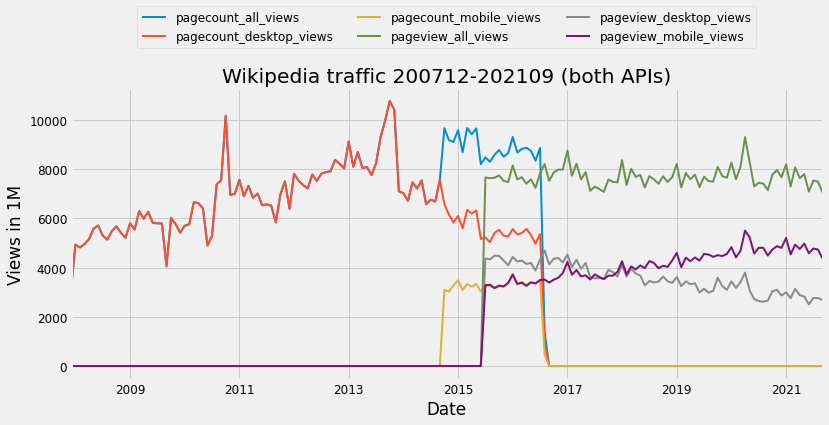

In [26]:
# Plot the time series (six lines included)

plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('fivethirtyeight')


ax = traffic.plot(linewidth=2, fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Views in 1M')
ax.legend(fontsize=12,loc='upper center', bbox_to_anchor=(0.5, 1.3),ncol=3)
ax.set_title("Wikipedia traffic 200712-202109 (both APIs)")


plt.savefig('traffic.png',bbox_inches='tight')

Text(0.5, 1.0, 'Page views API 200712-202109')

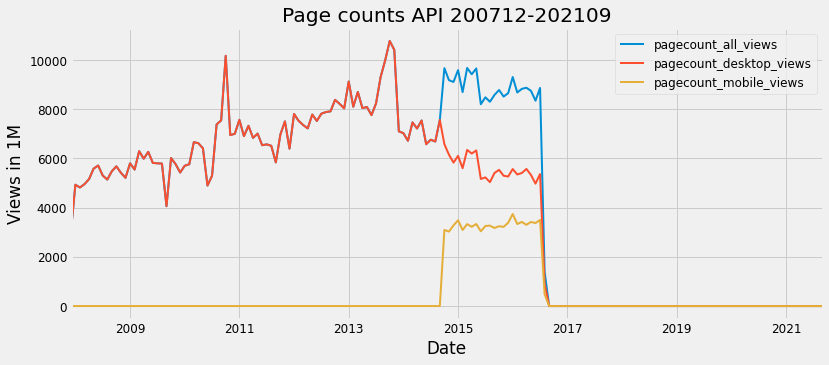

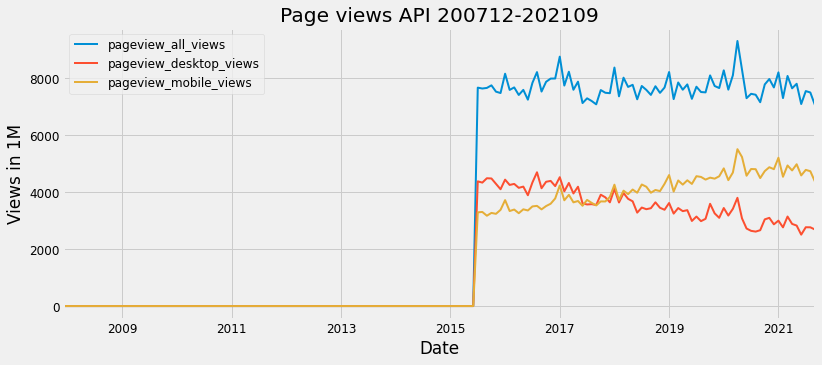

In [27]:
# plot two APIs seperatly 

ax = traffic.iloc[:,:3].plot(linewidth=2, fontsize=12)
ax.set_ylabel('Views in 1M')
ax.set_xlabel('Date')
ax.legend(fontsize=12)
ax.set_title('Page counts API 200712-202109')

ax = traffic.iloc[:,3:].plot(linewidth=2, fontsize=12)
ax.set_ylabel('Views in 1M')
ax.set_xlabel('Date')
ax.legend(fontsize=12)
ax.set_title('Page views API 200712-202109')